###### Ian Wafer
###### 19/10/19

In [114]:
import seaborn as sns
import pandas as pd
import matplotlib as plt

# Shorten code to read the tips dataset
tips = sns.load_dataset('tips')

To ensure the dataset loaded correctly we will print the first and last ten lines. 

In [3]:
# Show the first 10 lines of the dataset
print(tips.head(10))
print()

# Show the last 10 lines of the dataset
print(tips.tail(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240   

Text(10.049999999999997, 0.5, 'Tip ($)')

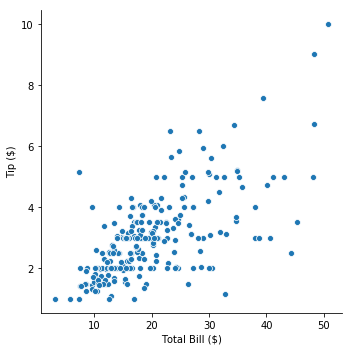

In [50]:
sns.relplot(x='total_bill', y='tip', data=tips)
plt.pyplot.xlabel('Total Bill ($)')
plt.pyplot.ylabel('Tip ($)')

From this graph we can see that the general trend for tipping is within certain limits of the total bill amount with exceptions in certain cases. This verifies the expectation that tipping is usually done as a percentage of the total bill amount. 

Next we will look at breaking down this data further to determine relationships in greater depth. 

First we will look at the amount of patrons divided into the sexes.

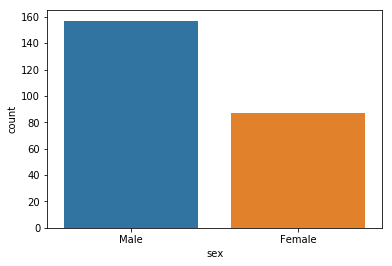

In [83]:
sns.countplot(x='sex', data=tips)

Here we can see there is almost double the amount of males to females attending the restaurant. This would be important to conisder for sample sizing purposes but the dataset has a large enough sample from both sexes to continue the analysis and expect an accurate representation. 

Next we will look the relationship between tips, total bill, sex and time.

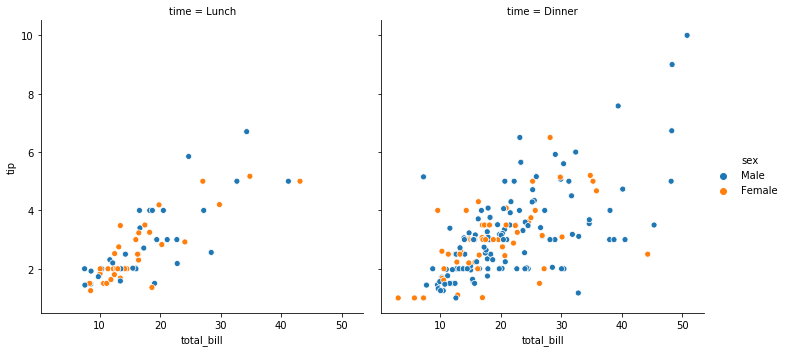

In [107]:
sns.relplot(x='total_bill', y='tip', hue='sex', col='time', data=tips)

The above graphs show that there are far more dinners than lunches and that the dinner total bill is much more likely to be higher in value than the lunch bill. We can also see that the range between $10-40 total bills appear evenly split between the sexs while the higher total bills and therefore larger tips (due to the relationship shown earliar) has only the males present. This could also be due to the fact that male have twice the representation than females in this particular dataset.

             total_bill   tip
sex    size                  
Male   1           8.58  1.92
       2          17.10  2.61
       3          24.29  3.48
       4          28.08  4.17
       5          30.12  3.75
       6          41.24  5.85
Female 1           6.80  1.28
       2          15.34  2.53
       3          21.55  3.25
       4          30.28  4.02
       5          29.85  5.14
       6          28.42  4.60


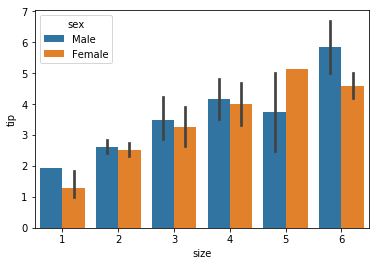

In [116]:
# Breakdown of categories of sex and size with respect to average total bill and tip amount

AVG = sexmean = tips.groupby(['sex', 'size']).mean()
print(AVG.round(2))

sns.barplot(x='size', y='tip', hue='sex', data=tips)

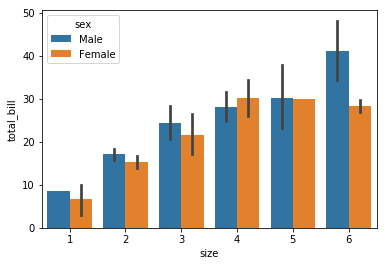

In [117]:
sns.barplot(x='size', y='total_bill', hue='sex', data=tips)

From the above we can see that as the group size increases so too does the average tip with the occasional anomoly. To determine if party size has an effect on the percentage of the bill tipped we need to take these average readings and determine the tip as a percentage of te total bill.

In [38]:
# Determine percentage of bill size that was tipped and round it to the closest whole number.

((AVG['tip'] / AVG['total_bill'])*100).round(0)

sex     size
Male    1       22.0
        2       15.0
        3       14.0
        4       15.0
        5       12.0
        6       14.0
Female  1       19.0
        2       16.0
        3       15.0
        4       13.0
        5       17.0
        6       16.0
dtype: float64

We can see that males and females of similar party size tip roughly the same amount with females giving a slightly higher percentage than men. In male parties they tend to tip slightly less as the party size increases.

In [40]:
# Minimum tip size by sex and size of party
sexmin = tips.groupby(['sex', 'size'])['tip'].min()
print(sexmin.round(2))
print()

# Maximum tip size by sex and size of party
sexmax = tips.groupby(['sex', 'size'])['tip'].max()
print(sexmax.round(2))

sex     size
Male    1       1.92
        2       1.00
        3       1.66
        4       2.00
        5       2.00
        6       5.00
Female  1       1.00
        2       1.00
        3       1.36
        4       2.45
        5       5.14
        6       4.20
Name: tip, dtype: float64

sex     size
Male    1        1.92
        2        5.85
        3       10.00
        4        9.00
        5        5.00
        6        6.70
Female  1        1.83
        2        5.00
        3        6.50
        4        5.20
        5        5.14
        6        5.00
Name: tip, dtype: float64


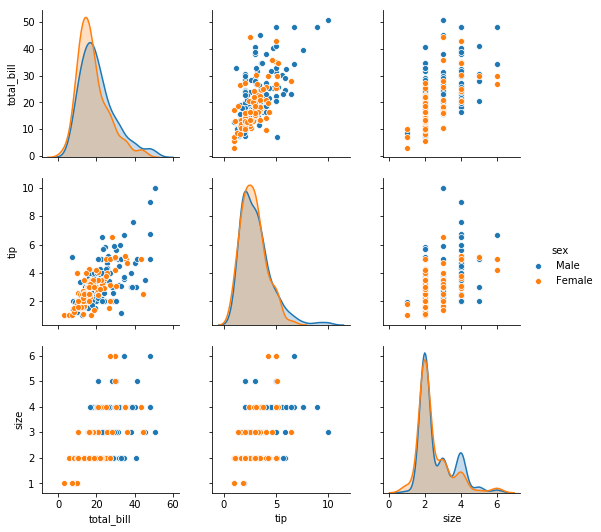

In [6]:
sns.pairplot(tips, hue="sex")

Source-https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700 accessed 2/11/2019
       https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ accessed 2/11/2019
       https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts accessed 2/11/2019
       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html accessed 2/11/2019
       https://seaborn.pydata.org/tutorial.html accessed 11/11/2019